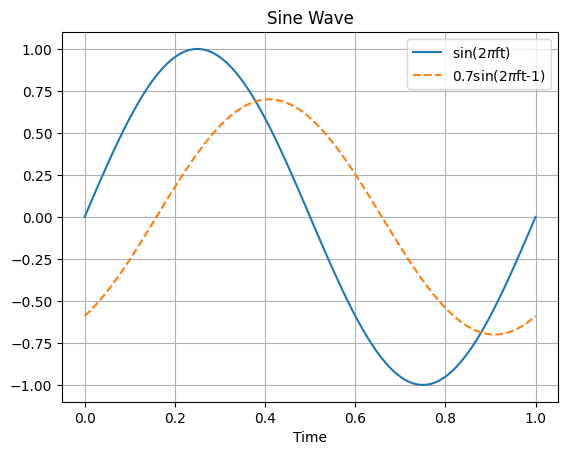

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,100)
f = 1 #1Hz

plt.plot(t, 1 * np.sin(2*np.pi*f*t + 0), "-",
         label='sin(2$\pi$ft)')
plt.plot(t, 0.7 * np.sin(2*np.pi*f*t - 1), ls="--",
         label='0.7sin(2$\pi$ft-1)')

plt.xlabel("Time")
plt.title("Sine Wave")
plt.legend();plt.grid();plt.show()

In [12]:
def fade_io(data, length = 1000):
    fade_in_data = np.linspace(0, 1, length)
    data[:length] *= fade_in_data
    fade_out_data = np.linspace(1, 0, length)
    data[-length:] *= fade_out_data
    return data

In [13]:
def sine_tone(f, duration=0.08, n=1280):
  t = np.linspace(0, duration, n)#fs = 1280/0.08 = 16kHz
  data = np.sin(2*np.pi*f*t)
  length = 10**int(np.log10(duration*n))
  return fade_io(data = data, length = length)

In [14]:
from IPython.display import Audio
Audio(sine_tone(300), rate=16000)

In [15]:
from IPython.display import Audio

fs = 16000
scale = [440 * 2**(i/12) for i in range(5)]
scale_tone = np.hstack([sine_tone(f) for f in scale])
Audio(scale_tone, rate = fs)

In [16]:
octave = [440*(i+1) for i in range(5)]
octave_tone = np.hstack([sine_tone(f) for f in octave])
Audio(octave_tone, rate = fs)

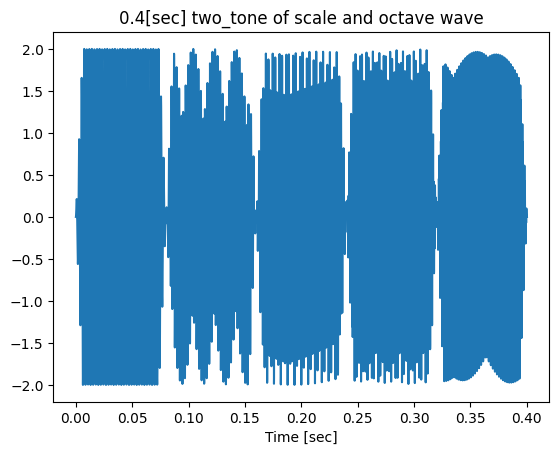

In [17]:
two_tone = np.add(scale_tone, octave_tone)

plt.plot(np.linspace(0,len(two_tone)/fs,len(two_tone)),two_tone)
plt.xlabel(f"Time [sec]")
plt.title(f"{len(two_tone)/fs}[sec] two_tone of scale and octave wave")
plt.show()
print()

In [18]:
Audio(two_tone, rate = fs)

FFT

In [19]:
from scipy.fftpack import fft

class MyException(Exception):
    pass

def n_fft(data, n_lim=20):
  for n in 2**np.arange(n_lim):
    if n >= len(data):
      return n
    if len(data) > 2**(n_lim-1) :
      raise MyException(f"increase 'n_lim' by more than '{n_lim}'!!")

data = two_tone

try:
  N = n_fft(data)
  print(f"data' {len(data)}', number for FFT '{N}'")
except MyException as e:
  print(e)

fs = 16000
Y = fft(data,N)

data' 6400', number for FFT '8192'


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


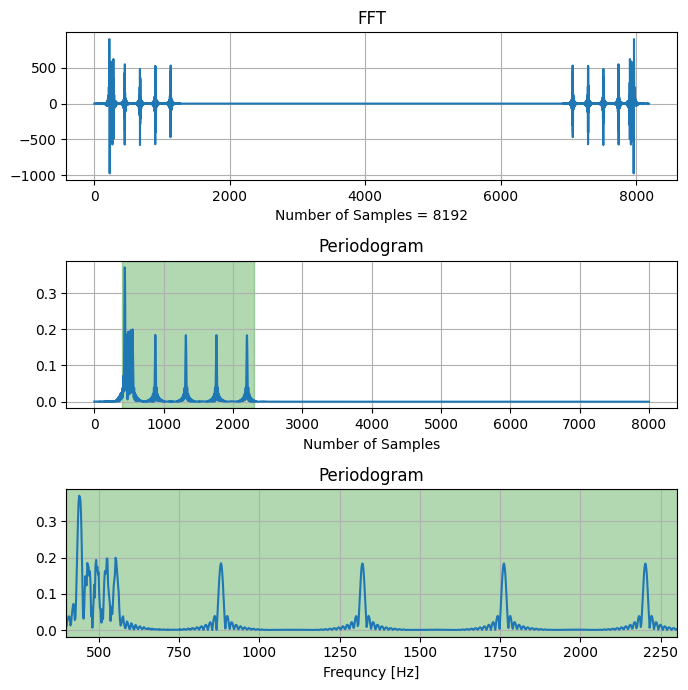

In [20]:
plt.figure(figsize =(7,7))
plt.subplot(311)
plt.plot(np.arange(len(Y)), Y)
plt.title('FFT')
plt.xlabel(f'Number of Samples = {len(Y)}')
plt.grid()

plt.subplot(312)
plt.plot(np.linspace(0, fs/2, N//2), 2*np.abs(Y[:N//2])/len(data))
plt.xlabel('Number of Samples')
plt.title('Periodogram')
plt.grid()
plt.axvspan(400,2300, alpha=0.3, color='green')

plt.subplot(313)
plt.plot(np.linspace(0, fs/2, N//2), 2*np.abs(Y[:N//2])/len(data))
plt.xlabel('Frequncy [Hz]')
plt.title('Periodogram')
plt.grid()
plt.axvspan(400, 2300, alpha=0.3, color='green')
plt.xlim(400, 2300)

plt.tight_layout()
plt.show()